<a href="https://colab.research.google.com/github/TamirMareli/Network-Traffic-Anomaly-Detection/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# NSL-KDD Column Names (41 Features + 'attack' + 'level')
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'attack', 'level'
]

# Loading the training and test sets
try:
    # NSL-KDD files do not have a header row
    df_train = pd.read_csv('KDDTrain+.txt', header=None, names=column_names)
    df_test = pd.read_csv('KDDTest+.txt', header=None, names=column_names)
    print(f"Training set loaded: {df_train.shape[0]} connections")
    print(f"Test set loaded: {df_test.shape[0]} connections")
except FileNotFoundError:
    print("Error: Ensure KDDTrain+.txt and KDDTest+.txt are available.")
    df_train = pd.DataFrame(columns=column_names)

# We will perform EDA primarily on the training set
df = df_train.copy()

Training set loaded: 125973 connections
Test set loaded: 22544 connections



--- Protocol Type Distribution ---
               Percentage   Count
protocol_type                    
tcp                 81.52  102689
udp                 11.90   14993
icmp                 6.58    8291


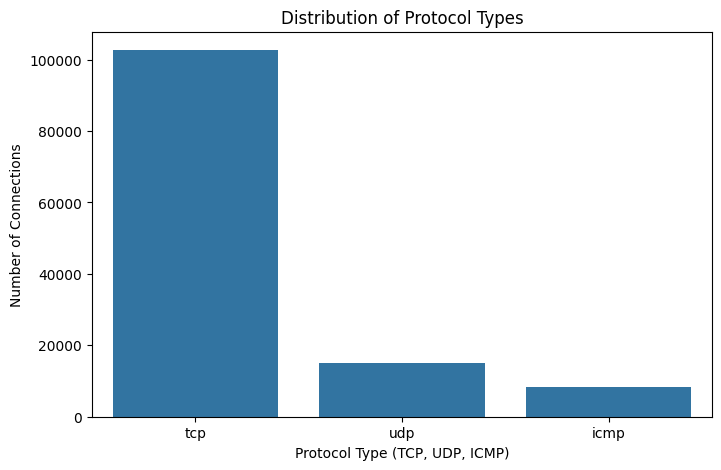

In [5]:
if not df.empty:
    print("\n--- Protocol Type Distribution ---")

    # Calculate counts and percentages
    protocol_summary = df['protocol_type'].value_counts(normalize=True).mul(100).rename('Percentage').to_frame().round(2)
    protocol_summary['Count'] = df['protocol_type'].value_counts()
    print(protocol_summary)

    # Visualization (Bar Plot)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=protocol_summary.index, y='Count', data=protocol_summary)
    plt.title('Distribution of Protocol Types')
    plt.xlabel('Protocol Type (TCP, UDP, ICMP)')
    plt.ylabel('Number of Connections')
    plt.show()


Total number of unique services in the dataset: 70

--- Top 10 Most Frequent Network Services ---
          Count
service        
http      40338
private   21853
domain_u   9043
smtp       7313
ftp_data   6860
eco_i      4586
other      4359
ecr_i      3077
telnet     2353
finger     1767


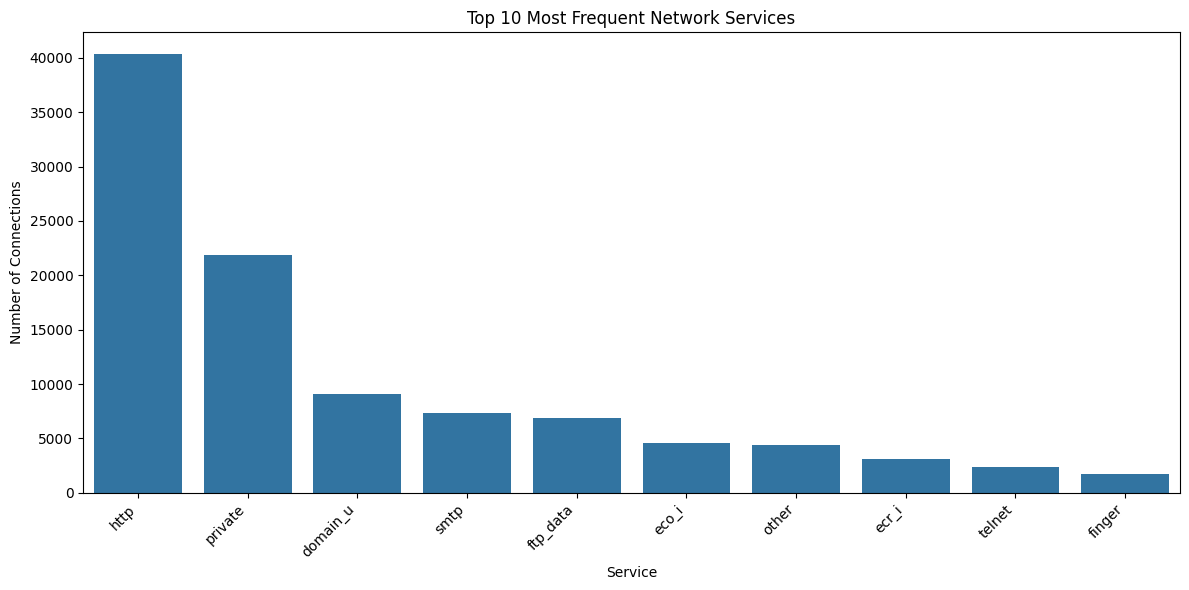

In [7]:
if not df.empty:
    num_services = df['service'].nunique()
    print(f"\nTotal number of unique services in the dataset: {num_services}")
    print("\n--- Top 10 Most Frequent Network Services ---")

    # Get top 10 services
    service_summary = df['service'].value_counts().head(10).rename('Count').to_frame()
    print(service_summary)

    # Visualization (Bar Plot)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=service_summary.index, y='Count', data=service_summary)
    plt.title('Top 10 Most Frequent Network Services')
    plt.xlabel('Service')
    plt.ylabel('Number of Connections')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

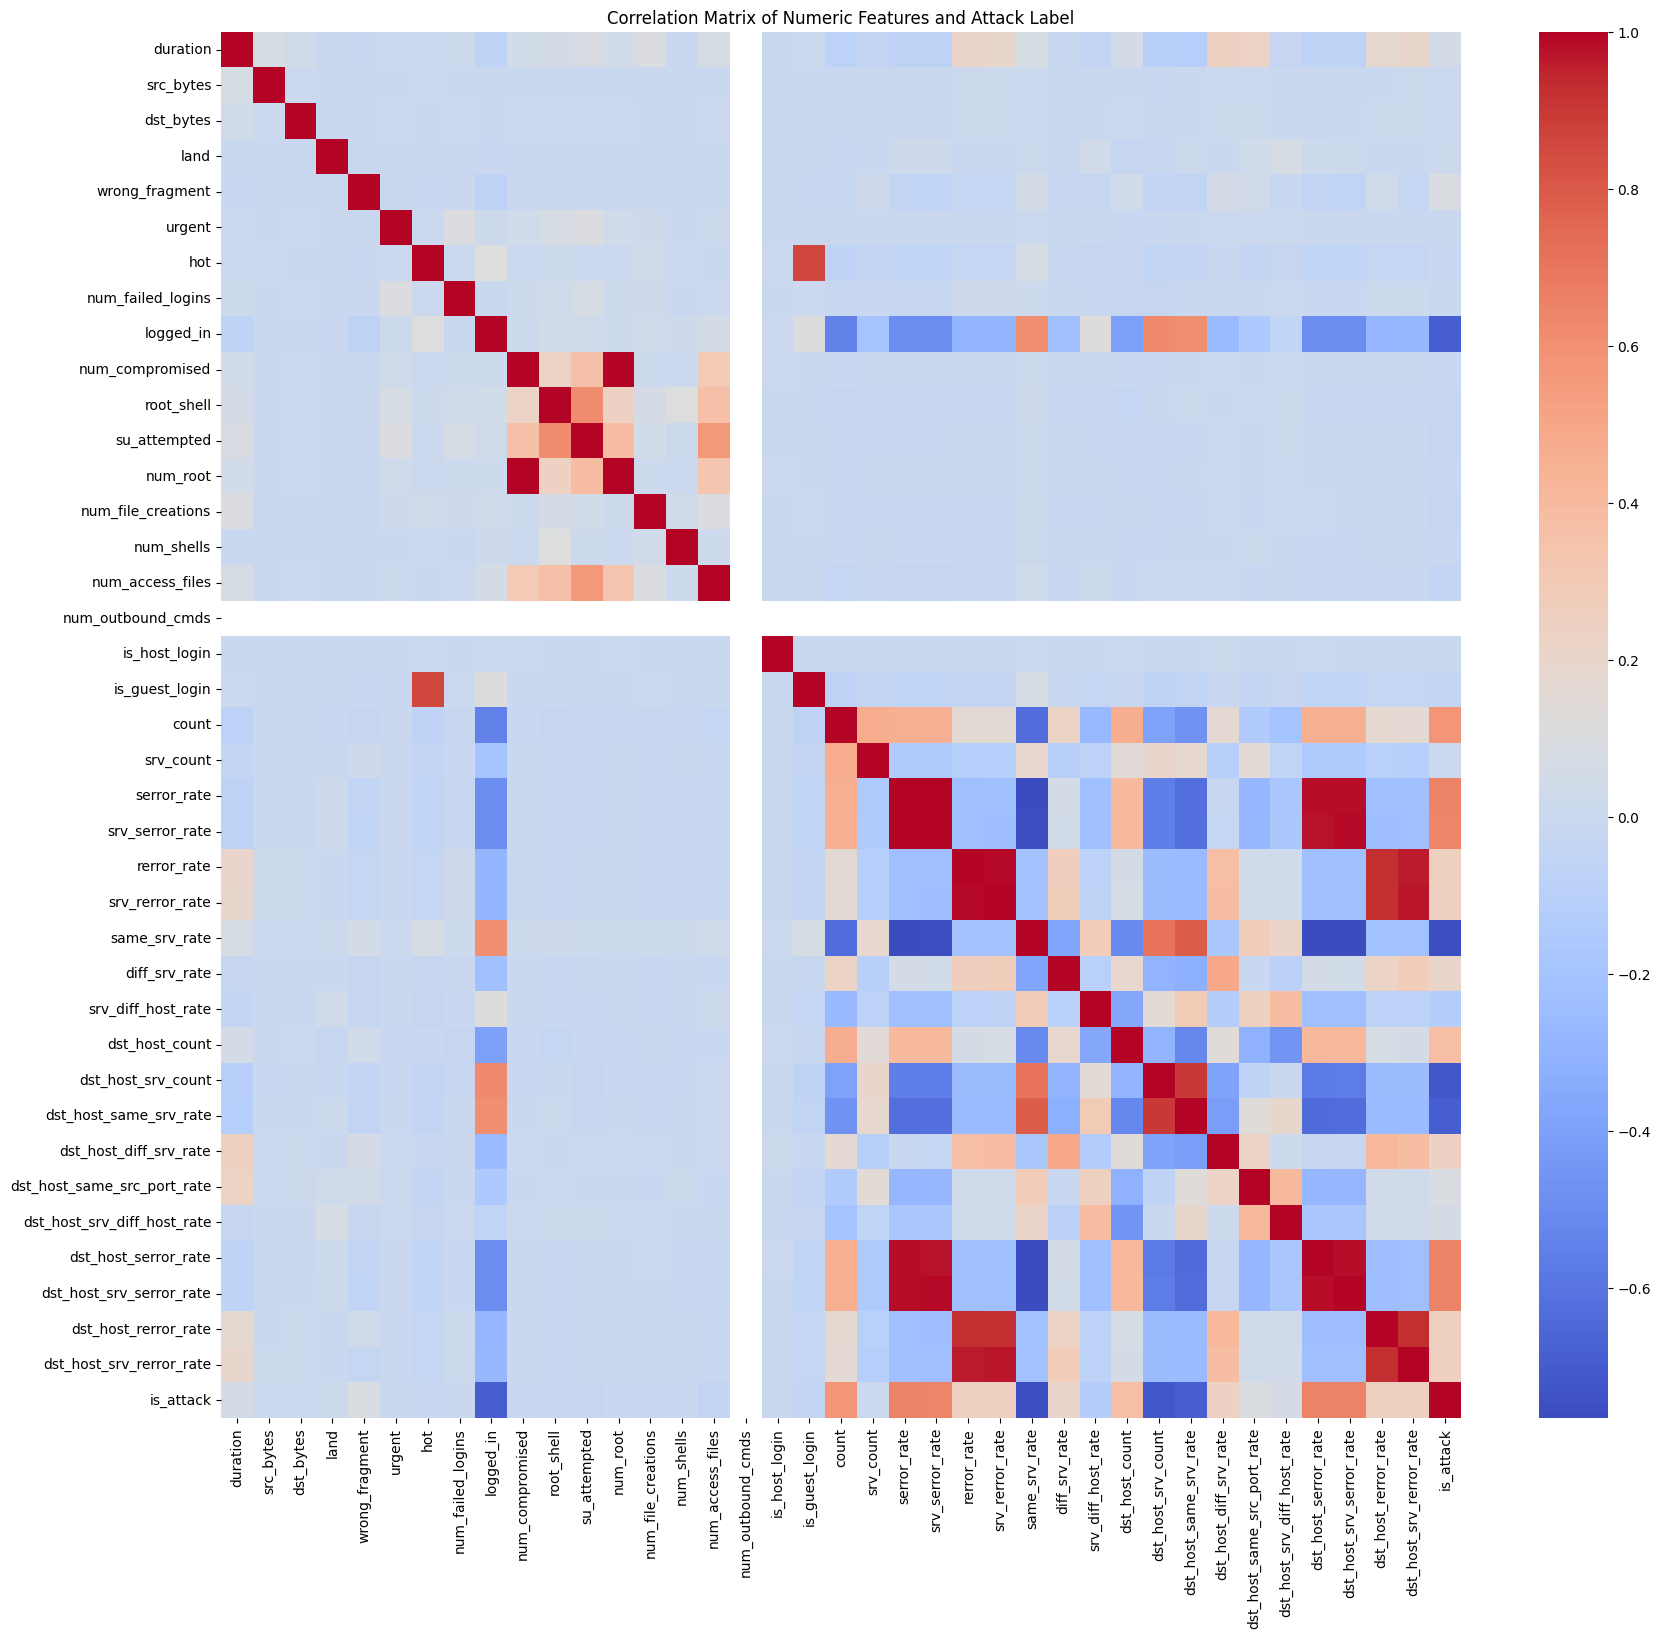


--- Top 5 Features with the Strongest Positive Correlation with 'is_attack' ---
is_attack                   1.000000
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
srv_serror_rate             0.648289
Name: is_attack, dtype: float64

--- 5 Features with the Strongest Negative Correlation with 'is_attack' (indicating normal connection) ---
logged_in                -0.690171
dst_host_same_srv_rate   -0.693803
dst_host_srv_count       -0.722535
same_srv_rate            -0.751913
num_outbound_cmds              NaN
Name: is_attack, dtype: float64


In [8]:
if not df.empty:
    # 1. Create a Binary Label: 0 = Normal, 1 = Attack
    df['is_attack'] = np.where(df['attack'] == 'normal', 0, 1)

    # 2. Select Numeric Features (excluding 'level')
    numeric_features = df.select_dtypes(include=['number']).columns.tolist()
    # Ensure 'level' is excluded as it's an ordinal difficulty score, not a feature
    numeric_features_for_corr = [f for f in numeric_features if f not in ['level', 'is_attack']]

    df_corr = df[numeric_features_for_corr + ['is_attack']].copy()

    # 3. Calculate Correlation Matrix
    corr_matrix = df_corr.corr()

    # 4. Visualization: Heatmap
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Correlation Matrix of Numeric Features and Attack Label')
    plt.show()



    # 5. Extract Correlation with 'is_attack'
    correlation_with_attack = corr_matrix['is_attack'].sort_values(ascending=False)

    print("\n--- Top 5 Features with the Strongest Positive Correlation with 'is_attack' ---")
    print(correlation_with_attack.head(5))
    print("\n--- 5 Features with the Strongest Negative Correlation with 'is_attack' (indicating normal connection) ---")
    print(correlation_with_attack.tail(5))